### importing the libraries for dataset

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

### Reading Dataset

In [2]:
dataset = pd.read_csv(r"F:\IIITBangloreAIML\7. Linear Regression Using Python\BikeSharingCompanyAssignment\day.csv")

### Data Dictionary Provided

- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registeredday.csv have the following fields:
	
	- instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users

### Fetching the first 5 rows

In [3]:
dataset.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Checking the dataset shape

In [4]:
dataset.shape

(730, 16)

### Checking the basic information of the dataset

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


### getting the statistical information of the dataset

In [6]:

dataset.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Data Preprocessing and Handling

### instant column is basically the index of the rows hence we can drop that

In [7]:

dataset.drop(columns=['instant'],inplace=True)

## Checking the season column

In [8]:
dataset['season'].value_counts()

season
3    188
2    184
1    180
4    178
Name: count, dtype: int64

In [9]:
# mapping the values and then performing the one hot encoding (1:spring, 2:summer, 3:fall, 4:winter)
dataset['season'] = dataset['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

In [10]:
dataset['season'].value_counts()

season
fall      188
summer    184
spring    180
winter    178
Name: count, dtype: int64

In [11]:
# Now performing the one hot encoding since it is a categorical variable
seasons = pd.get_dummies(dataset['season'],drop_first=True)

In [12]:
seasons = seasons.astype('int')

In [13]:
seasons

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
725,1,0,0
726,1,0,0
727,1,0,0
728,1,0,0


In [14]:
dataset = pd.concat([dataset,seasons],axis=1)

In [15]:
dataset

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,spring,summer,winter
0,01-01-2018,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,1,0,0
1,02-01-2018,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,1,0,0
2,03-01-2018,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,1,0,0
3,04-01-2018,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,1,0,0
4,05-01-2018,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,27-12-2019,spring,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114,1,0,0
726,28-12-2019,spring,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095,1,0,0
727,29-12-2019,spring,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341,1,0,0
728,30-12-2019,spring,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796,1,0,0


In [16]:
# Now we can drop seasons columns
dataset.drop(columns=['season'],inplace=True)

### Checking the weathersit column 

In [17]:
#1: Clear, Few clouds, Partly cloudy, Partly cloudy
#2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
#3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
#4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

dataset['weathersit'].value_counts()

weathersit
1    463
2    246
3     21
Name: count, dtype: int64

In [18]:
dataset['weathersit'] = dataset['weathersit'].map({1:'Clear, Few clouds, Partly cloudy, Partly cloudy',2:'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist',3:'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',4:'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog'})

In [19]:
dataset['weathersit'].value_counts()

weathersit
Clear, Few clouds, Partly cloudy, Partly cloudy                                            463
Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist                               246
Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds     21
Name: count, dtype: int64

In [20]:
weather_situations = pd.get_dummies(dataset['weathersit'],drop_first=True)

In [21]:
weather_situations = weather_situations.astype('int')

In [22]:
weather_situations

,"Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds","Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist"
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0
...,...,...
725,0,1
726,0,1
727,0,1
728,0,0


In [23]:
# merging it into our dataset
dataset = pd.concat([dataset,weather_situations],axis=1)

In [24]:
# Now we can drop weathersit column
dataset.drop(columns='weathersit',inplace=True)

In [25]:
dataset.head(3)

,dteday,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,spring,summer,winter,"Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds","Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist"
0,01-01-2018,0,1,0,6,0,14.110847,18.18125,80.5833,10.749882,331,654,985,1,0,0,0,1
1,02-01-2018,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,131,670,801,1,0,0,0,1
2,03-01-2018,0,1,0,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,1,0,0,0,0


### model training can not take place with the date column hence dropping it

In [26]:
dataset.drop(columns='dteday',inplace=True)

In [27]:
# renaming columns
dataset.rename(columns = {'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds':'Light Snow/Rain & Clouds','Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist':'Mist & Clouds'},inplace=True)

### checking the correlation of the variables

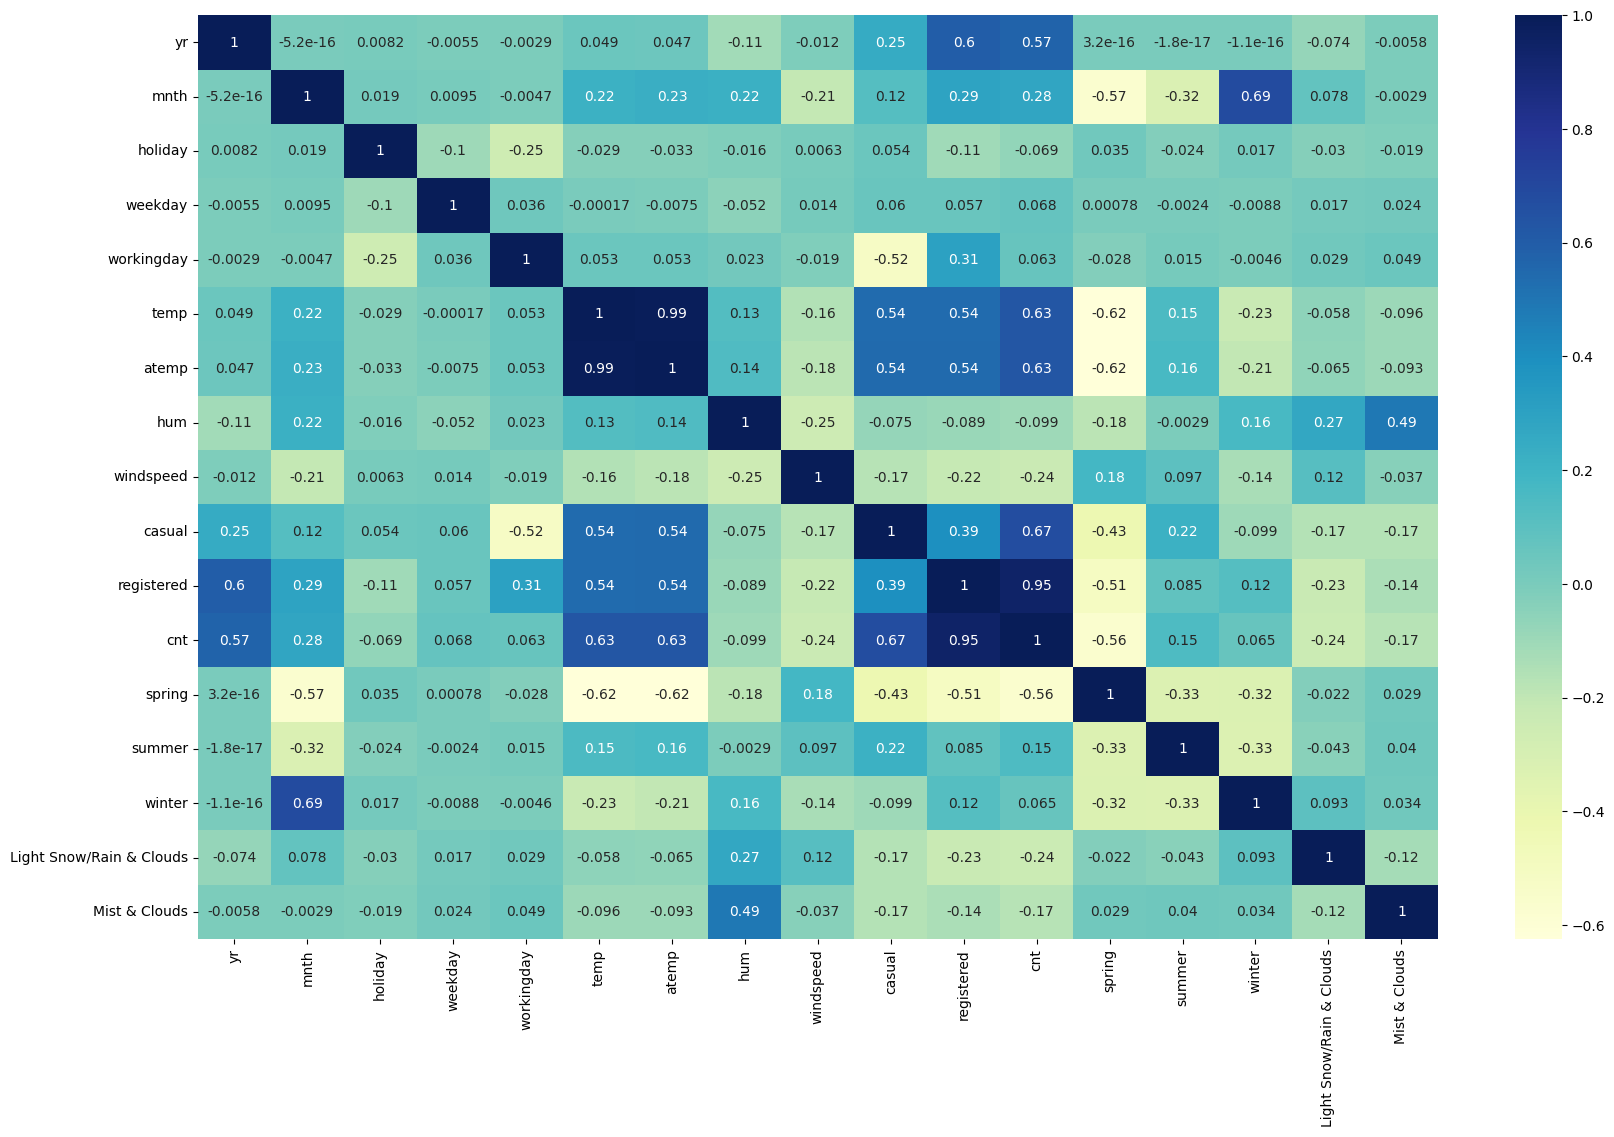

In [28]:
plt.figure(figsize=(20,12))
sns.heatmap(dataset.corr(),annot=True,cmap='YlGnBu')
plt.show()

### Inference : cnt (count of total rental bikes including both casual and registered) column is highly correlated with registered column followed by casual column (since cnt = registered+casual) followed by temp and feeling temperature

In [29]:
dataset.head(4)

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,spring,summer,winter,Light Snow/Rain & Clouds,Mist & Clouds
0,0,1,0,6,0,14.110847,18.18125,80.5833,10.749882,331,654,985,1,0,0,0,1
1,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,131,670,801,1,0,0,0,1
2,0,1,0,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,1,0,0,0,0
3,0,1,0,2,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,1,0,0,0,0


### let's see the relationship of cnt(Rental Count) column with the categorical variables columns using boxplots

### Years vs Rental Bikes Count

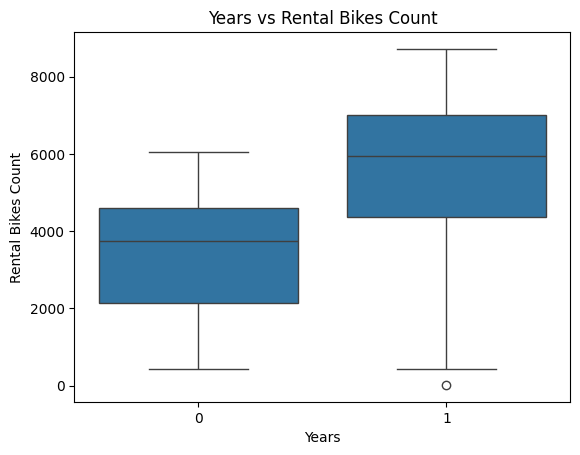

In [30]:

# checking with year
sns.boxplot(x='yr',y='cnt',data=dataset)
plt.xlabel('Years')
plt.ylabel('Rental Bikes Count')
plt.title('Years vs Rental Bikes Count')
plt.show()

In [31]:
dataset.groupby(by='yr')['cnt'].describe()

,count,mean,std,min,25%,50%,75%,max
yr,,,,,,,,
0,365.0,3405.761644,1378.753666,431.0,2132.0,3740.0,4586.0,6043.0
1,365.0,5610.252055,1780.183449,22.0,4375.0,5936.0,7013.0,8714.0


### Inference :  there is a large difference in the median values of both the plots from year 2018 (0) to 2019 (1) showing an upward growth for the company

### Checking the monthly demand i.e. Daily Rental Count by Month

In [32]:
df_grouped_by_mnth = dataset.groupby(by='mnth')['cnt'].describe().sort_values(by='max',ascending=False)

In [33]:
df_grouped_by_mnth

,count,mean,std,min,25%,50%,75%,max
mnth,,,,,,,,
9,60.0,5766.516667,1810.130649,1842.0,4532.00,5384.0,7509.25,8714.0
3,62.0,3692.258065,1899.301812,605.0,2077.00,3216.5,5361.00,8362.0
5,62.0,5349.774194,1298.711561,2633.0,4409.00,4890.5,6405.50,8294.0
7,62.0,5563.677419,1273.751871,3285.0,4491.50,5446.5,6678.75,8173.0
10,62.0,5199.225806,1988.392517,22.0,3967.25,5013.0,7238.75,8156.0
6,60.0,5772.366667,1240.400031,3767.0,4834.50,5308.5,6983.00,8120.0
8,62.0,5664.419355,1494.516146,1115.0,4582.50,5229.5,7121.00,7865.0
4,60.0,4484.900000,1776.160778,795.0,3188.25,4293.5,6205.25,7460.0
11,60.0,4247.183333,1285.712709,1495.0,3386.00,4081.0,5317.00,6852.0


### Inference : Count of rental bikes is maximum in the month of september followed by march and May..

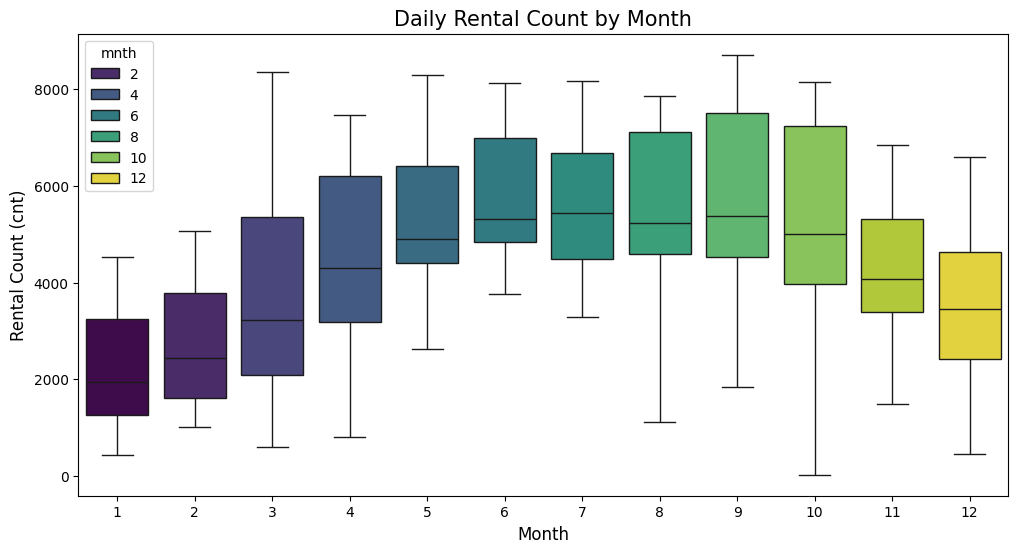

In [34]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=dataset['mnth'], y=dataset['cnt'], palette='viridis',hue=dataset['mnth'])
plt.title('Daily Rental Count by Month', fontsize=15)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Rental Count (cnt)', fontsize=12)
plt.show()

### checking the impact of holiday over rental count

In [35]:
dataset['holiday'].value_counts()

holiday
0    709
1     21
Name: count, dtype: int64

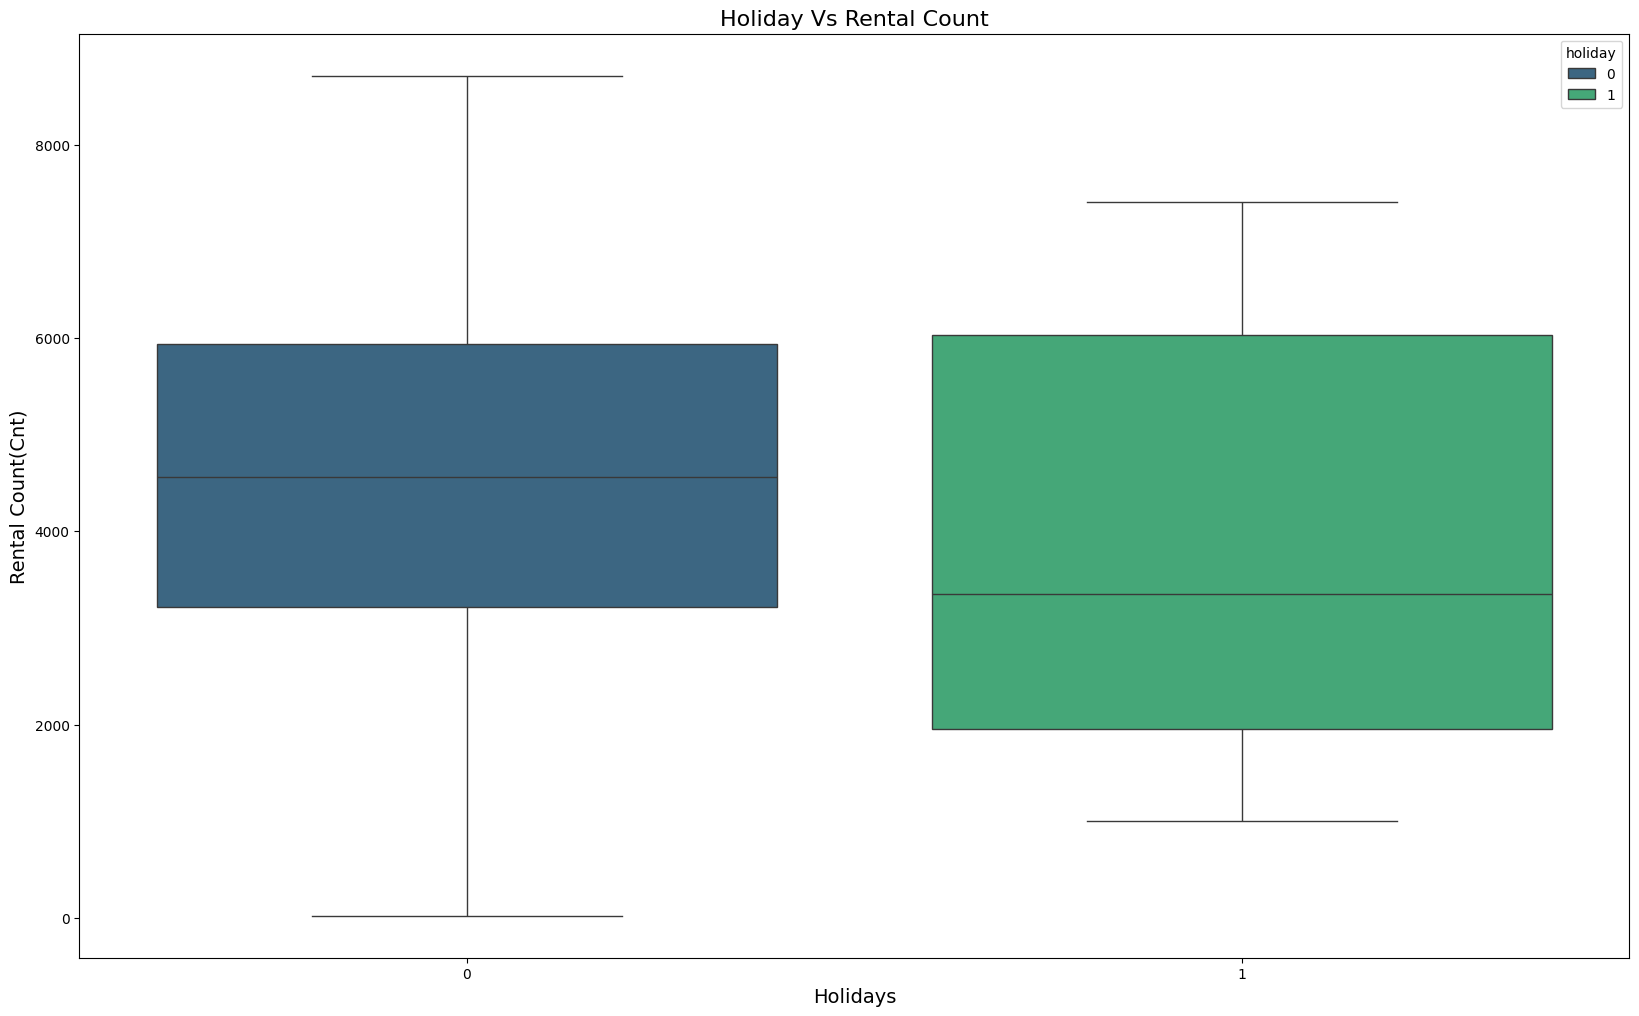

In [36]:
plt.figure(figsize=(20,12))
sns.boxplot(x='holiday',y='cnt',data=dataset,palette='viridis',hue=dataset['holiday'])
plt.xlabel('Holidays',fontsize=14)
plt.ylabel('Rental Count(Cnt)',fontsize=14)
plt.title('Holiday Vs Rental Count',fontsize=16)
plt.show()

In [37]:
# exploring mathematically also
dataset.groupby(by='holiday')['cnt'].describe()

,count,mean,std,min,25%,50%,75%,max
holiday,,,,,,,,
0,709.0,4530.90268,1927.71680,22.0,3214.0,4563.0,5936.0,8714.0
1,21.0,3735.00000,2103.35066,1000.0,1951.0,3351.0,6034.0,7403.0


### Inference : When the holidays are not there the Minimum demand is very low as compared to the demand on the holdiays , but the trend is more towards the non holidays section since the overall demand is higher in case of non holiday days

 ### checking for weekday column vs rental count column 

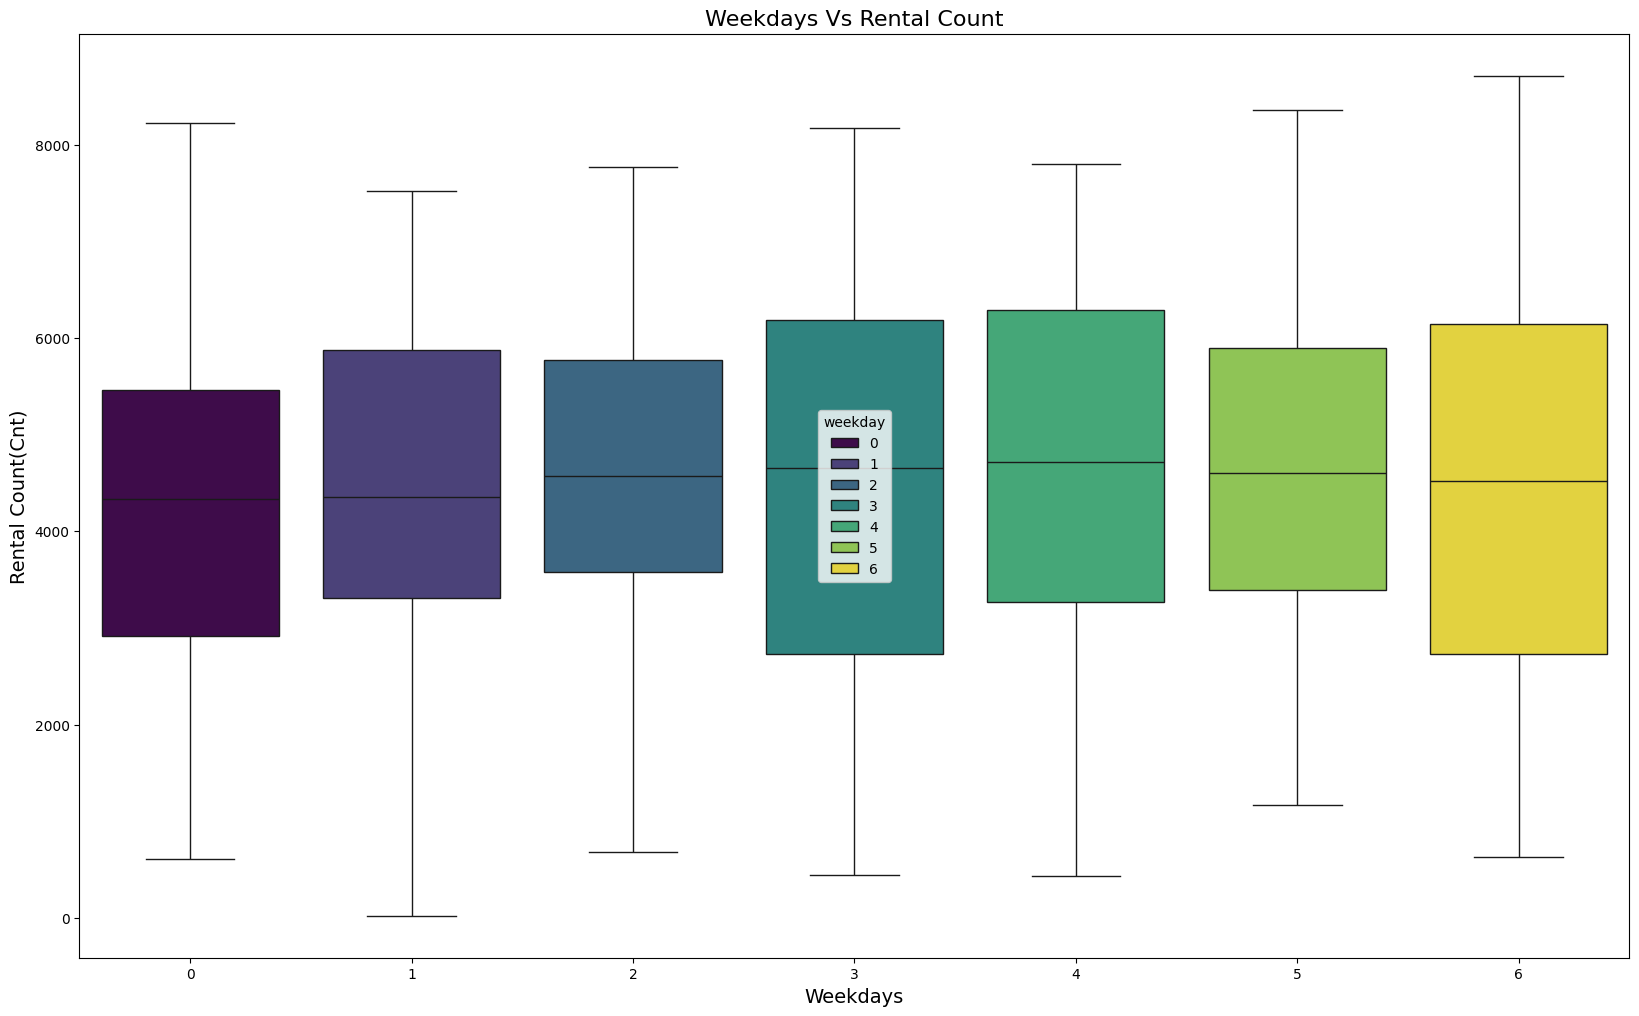

In [38]:

plt.figure(figsize=(20,12))
sns.boxplot(x='weekday',y='cnt',data=dataset,palette='viridis',hue=dataset['weekday'])
plt.xlabel('Weekdays',fontsize=14)
plt.ylabel('Rental Count(Cnt)',fontsize=14)
plt.title('Weekdays Vs Rental Count',fontsize=16)
plt.show()

In [39]:
# exploring mathematically also
dataset.groupby(by='weekday')['cnt'].describe().sort_values(by='max',ascending=False)

,count,mean,std,min,25%,50%,75%,max
weekday,,,,,,,,
6,105.0,4550.542857,2196.693009,627.0,2732.00,4521.0,6140.0,8714.0
5,104.0,4690.288462,1874.624870,1167.0,3390.75,4601.5,5900.5,8362.0
0,105.0,4228.828571,1872.496629,605.0,2918.00,4334.0,5464.0,8227.0
3,103.0,4574.893204,2030.176095,441.0,2731.00,4656.0,6182.5,8173.0
4,104.0,4667.259615,1939.433317,431.0,3270.75,4721.0,6286.0,7804.0
2,104.0,4510.663462,1826.911642,683.0,3579.25,4576.5,5769.0,7767.0
1,105.0,4338.123810,1793.074013,22.0,3310.00,4359.0,5875.0,7525.0


### Inference : Median values are almost similar for all the week days , although the max value for rental count is obtained in 6th Weekday and minimum value is obtained in 1st Weekday

### comparing workingday column with the rental count

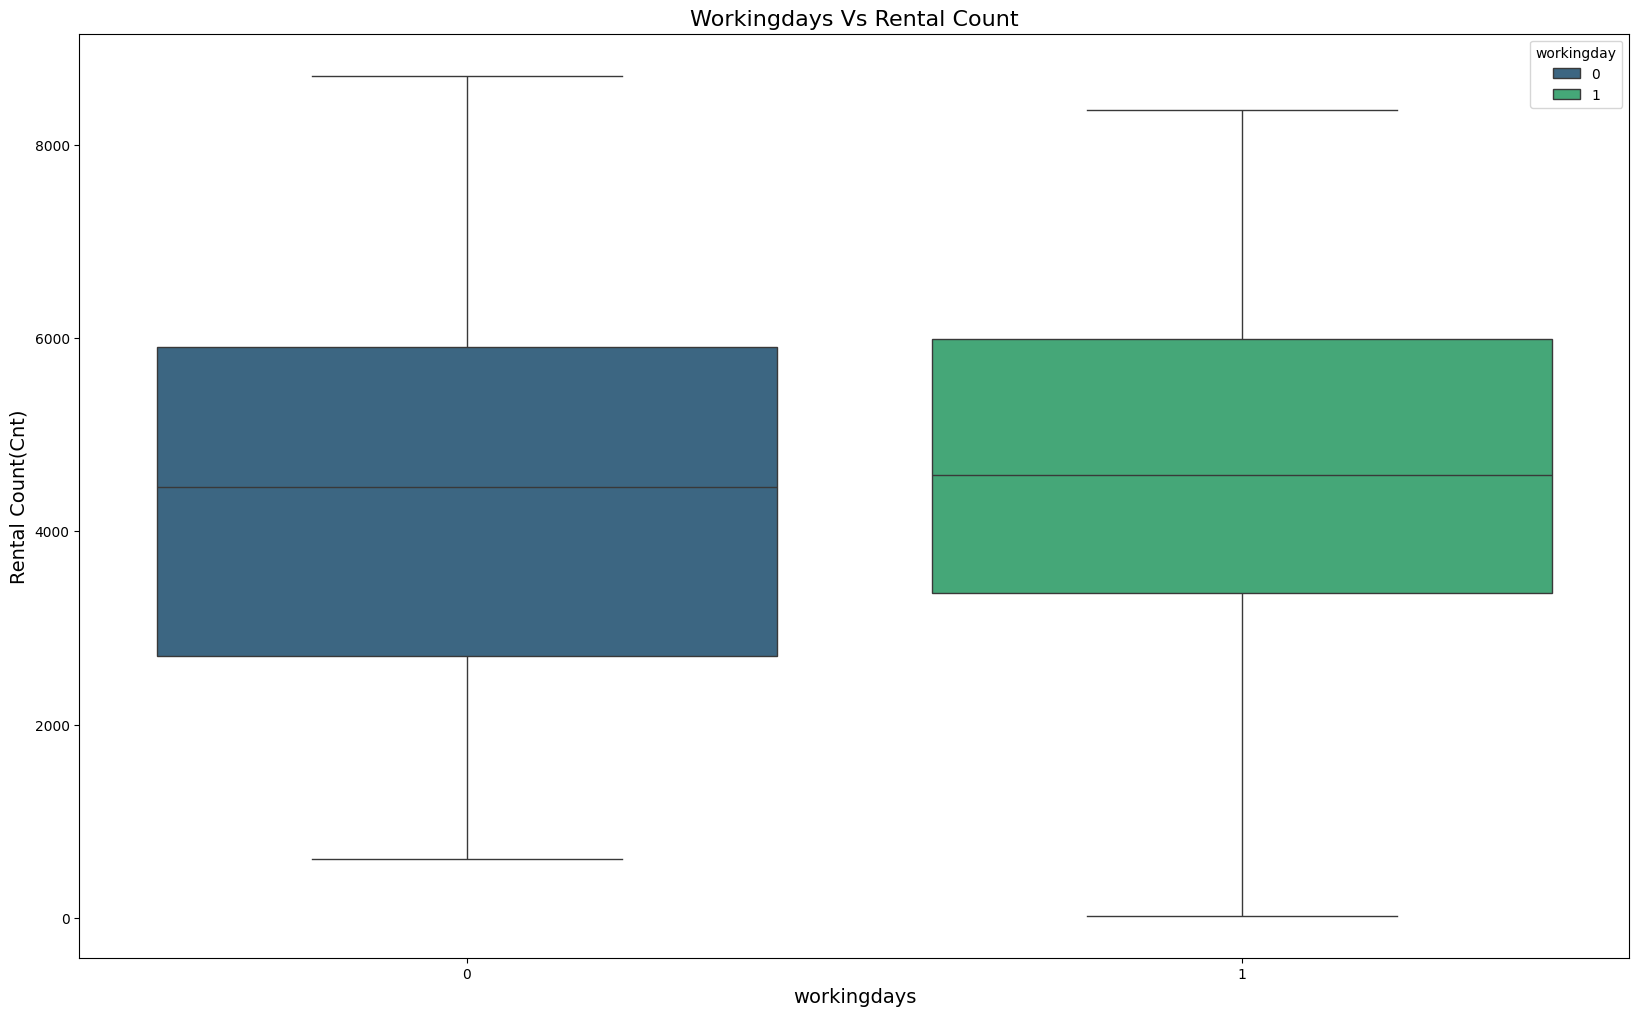

In [40]:

plt.figure(figsize=(20,12))
sns.boxplot(x='workingday',y='cnt',data=dataset,palette='viridis',hue=dataset['workingday'])
plt.xlabel('workingdays',fontsize=14)
plt.ylabel('Rental Count(Cnt)',fontsize=14)
plt.title('Workingdays Vs Rental Count',fontsize=16)
plt.show()

In [41]:
# exploring mathematically also
dataset.groupby(by='workingday')['cnt'].describe().sort_values(by='max',ascending=False)

,count,mean,std,min,25%,50%,75%,max
workingday,,,,,,,,
0,231.0,4330.168831,2052.141245,605.0,2710.5,4459.0,5907.5,8714.0
1,499.0,4590.332665,1876.247607,22.0,3362.0,4585.0,5989.0,8362.0


### Inference : The overall demand for Rentals is quite similar on a working day and a non working day

## Data Splitting 

In [42]:
# splitting the data using train_test_split 
from sklearn.model_selection import train_test_split

In [43]:
df_train , df_test = train_test_split(dataset,train_size=0.7,random_state=100)

In [44]:
df_train.shape

(510, 17)

In [45]:
df_test.shape

(220, 17)

In [46]:
df_train.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,spring,summer,winter,Light Snow/Rain & Clouds,Mist & Clouds
576,1,7,0,2,1,29.246653,33.1448,70.4167,11.083475,968,6248,7216,0,0,0,0,0
426,1,3,0,6,0,16.980847,20.6746,62.1250,10.792293,956,3110,4066,1,0,0,0,1
728,1,12,0,0,0,10.489153,11.5850,48.3333,23.500518,364,1432,1796,1,0,0,0,0
482,1,4,0,6,0,15.443347,18.8752,48.9583,8.708325,1120,3100,4220,0,1,0,0,1
111,0,4,0,5,1,13.803347,16.0977,72.9583,14.707907,177,1506,1683,0,1,0,0,1


In [47]:
df_test.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,spring,summer,winter,Light Snow/Rain & Clouds,Mist & Clouds
184,0,7,1,1,0,29.793347,33.27085,63.7917,5.459106,3065,2978,6043,0,0,0,0,1
535,1,6,0,3,1,32.082500,36.04875,59.2083,7.625404,872,5339,6211,0,1,0,0,0
299,0,10,0,4,1,19.270000,22.85230,81.2917,13.250121,240,2419,2659,0,0,1,0,1
221,0,8,0,3,1,31.433347,34.24915,42.4167,13.417286,884,3896,4780,0,0,0,0,0
152,0,6,0,4,1,29.315000,32.19710,30.5000,19.583229,736,4232,4968,0,1,0,0,0


### Rescaling the values

In [48]:
# lets use min max scaler (x - xmin)/(xmax - xmin)
from sklearn.preprocessing import MinMaxScaler

In [49]:
num_vars = ['temp','atemp','hum','windspeed','casual','registered','cnt']

In [50]:
scaler = MinMaxScaler()

In [51]:
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [52]:
df_train.head(7)

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,spring,summer,winter,Light Snow/Rain & Clouds,Mist & Clouds
576,1,7,0,2,1,0.815169,0.766351,0.725633,0.264686,0.294422,0.899220,0.827658,0,0,0,0,0
426,1,3,0,6,0,0.442393,0.438975,0.640189,0.255342,0.290765,0.446145,0.465255,1,0,0,0,1
728,1,12,0,0,0,0.245101,0.200348,0.498067,0.663106,0.110332,0.203869,0.204096,1,0,0,0,0
482,1,4,0,6,0,0.395666,0.391735,0.504508,0.188475,0.340750,0.444701,0.482973,0,1,0,0,1
111,0,4,0,5,1,0.345824,0.318819,0.751824,0.380981,0.053337,0.214554,0.191095,0,1,0,0,1
580,1,8,0,6,0,0.914852,0.882350,0.632030,0.462538,0.714112,0.643806,0.782559,0,0,0,0,0
500,1,5,0,3,1,0.719639,0.678508,0.719193,0.172431,0.301432,0.925931,0.851588,0,1,0,0,0


### Now all the binary variabels are 0s and 1s and the other numeric variables are on a scale between 0 and 1

In [53]:
df_train[num_vars].describe()

,temp,atemp,hum,windspeed,casual,registered,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.537440,0.513156,0.650480,0.320883,0.254689,0.523781,0.513499
std,0.225858,0.212410,0.145846,0.169803,0.206015,0.227896,0.224421
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.332086,0.538643,0.199179,0.094179,0.353487,0.356420
50%,0.542596,0.529718,0.653714,0.296763,0.212740,0.525123,0.518638
75%,0.735215,0.688457,0.754830,0.414447,0.327415,0.696073,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### creating x_train , y_train from df_train

In [54]:

y_train = df_train.pop('cnt')
x_train = df_train

In [55]:
x_train.head(3)

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,spring,summer,winter,Light Snow/Rain & Clouds,Mist & Clouds
576,1,7,0,2,1,0.815169,0.766351,0.725633,0.264686,0.294422,0.899220,0,0,0,0,0
426,1,3,0,6,0,0.442393,0.438975,0.640189,0.255342,0.290765,0.446145,1,0,0,0,1
728,1,12,0,0,0,0.245101,0.200348,0.498067,0.663106,0.110332,0.203869,1,0,0,0,0


In [56]:
y_train.head(3)

576    0.827658
426    0.465255
728    0.204096
Name: cnt, dtype: float64

### building the model with all the variables first

In [57]:
# adding constant 
x_train_sm = sm.add_constant(x_train)

In [58]:
x_train_sm.head(2)

,const,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,spring,summer,winter,Light Snow/Rain & Clouds,Mist & Clouds
576,1.0,1,7,0,2,1,0.815169,0.766351,0.725633,0.264686,0.294422,0.899220,0,0,0,0,0
426,1.0,1,3,0,6,0,0.442393,0.438975,0.640189,0.255342,0.290765,0.446145,1,0,0,0,1


### creating the model

In [59]:

lr_model = sm.OLS(y_train,x_train_sm)

In [60]:
lr_model = lr_model.fit()

In [61]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.396e+28
Date:                Mon, 23 Dec 2024   Prob (F-statistic):               0.00
Time:                        13:53:18   Log-Likelihood:                 16078.
No. Observations:                 510   AIC:                        -3.212e+04
Df Residuals:                     493   BIC:                        -3.205e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     5.889e-16   2.21e-15      0.267      0.790   -3.75e-15    4.93e-15
yr                       -5.248e-16   7.67e-16     -0.684      0.494   -2.03e-15    9.82e-16
mnth                      5.358e-16   1.27e-16      4.228      0.000    2.87e-16    7.85e-16
holiday                   5.948e-16   1.48e-15      0.401      0.689   -2.32e-15    3.51e-15
weekday                  -1.866e-15   1.14e-16    -16.437      0.000   -2.09e-15   -1.64e-15
workingday               -3.513e-16   8.81e-16     -0.399      0.690   -2.08e-15    1.38e-15
temp                     -1.311e-15   7.57e-15     -0.173      0.863   -1.62e-14    1.36e-14
atemp                     2.168e-16   7.65e-15      0.028      0.977   -1.48e-14    1.52e-14
hum                      -3.764e-16   2.12e-15     -0.177      0.859   -4.55e-15    3.79e-15
windspeed                 -4.77e-17   1.52e-15     -0.031      0.975   -3.04e-15    2.94e-15
casual                       0.3775   2.16e-15   1.75e+14      0.000       0.377       0.377
registered                   0.7968   2.57e-15   3.11e+14      0.000       0.797       0.797
spring                   -3.123e-16   1.26e-15     -0.249      0.804   -2.78e-15    2.15e-15
summer                   -2.307e-16   8.56e-16     -0.270      0.788   -1.91e-15    1.45e-15
winter                    1.379e-16   1.03e-15      0.134      0.893   -1.88e-15    2.16e-15
Light Snow/Rain & Clouds  3.816e-16    1.6e-15      0.239      0.811   -2.76e-15    3.52e-15
Mist & Clouds             -1.37e-16   6.02e-16     -0.228      0.820   -1.32e-15    1.05e-15
==============================================================================
Omnibus:                       33.979   Durbin-Watson:                   1.565
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               12.606
Skew:                          -0.041   Prob(JB):                      0.00183
Kurtosis:                       2.234   Cond. No.                         389.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [62]:
# VIF Calculation
VIF = pd.DataFrame()
VIF['Column Name'] = x_train.columns
VIF['VIF Score'] = [variance_inflation_factor(x_train.values,i) for i in range(x_train.shape[1])]

In [63]:
VIF.sort_values(by='VIF Score',ascending=False)

,Column Name,VIF Score
5,temp,393.364159
6,atemp,367.405035
10,registered,42.779891
7,hum,30.798523
1,mnth,15.679359
4,workingday,10.469210
9,casual,9.814486
0,yr,6.018032
8,windspeed,5.276042
13,winter,5.084901


### High Pvalue , High VIF -> DROP<br/>
### LOW Pvalue , Low VIF -> Keep<br/>
### High Pvalue , low Vif -> drop the column then retrain the model<br/>

In [64]:
# temp col has high pvalue and high vif hence dropping it and retaining the model
x_train_sm = x_train_sm.drop(columns=['temp'])

In [65]:
#retraining the model
lr_model2 = sm.OLS(y_train,x_train_sm).fit()

In [66]:
lr_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.141e+29
Date:                Mon, 23 Dec 2024   Prob (F-statistic):               0.00
Time:                        13:53:18   Log-Likelihood:                 16538.
No. Observations:                 510   AIC:                        -3.304e+04
Df Residuals:                     494   BIC:                        -3.298e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     7.286e-16   8.93e-16      0.816      0.415   -1.03e-15    2.48e-15
yr                       -1.362e-16   3.11e-16     -0.438      0.662   -7.47e-16    4.75e-16
mnth                      1.739e-16   5.14e-17      3.381      0.001    7.28e-17    2.75e-16
holiday                  -3.553e-16   6.01e-16     -0.591      0.555   -1.54e-15    8.26e-16
weekday                  -7.754e-16   4.61e-17    -16.831      0.000   -8.66e-16   -6.85e-16
workingday               -9.541e-17   3.57e-16     -0.267      0.789   -7.97e-16    6.06e-16
atemp                     -3.99e-17   9.05e-16     -0.044      0.965   -1.82e-15    1.74e-15
hum                      -4.979e-16   8.61e-16     -0.579      0.563   -2.19e-15    1.19e-15
windspeed                 8.587e-17   6.02e-16      0.143      0.887    -1.1e-15    1.27e-15
casual                       0.3775   8.68e-16   4.35e+14      0.000       0.377       0.377
registered                   0.7968   1.04e-15   7.66e+14      0.000       0.797       0.797
spring                   -4.658e-16   4.93e-16     -0.945      0.345   -1.43e-15    5.03e-16
summer                   -3.036e-16   3.32e-16     -0.913      0.362   -9.57e-16    3.49e-16
winter                    9.801e-17   3.93e-16      0.249      0.803   -6.74e-16     8.7e-16
Light Snow/Rain & Clouds -2.602e-17   6.46e-16     -0.040      0.968    -1.3e-15    1.24e-15
Mist & Clouds              3.99e-17   2.44e-16      0.163      0.870    -4.4e-16     5.2e-16
==============================================================================
Omnibus:                       31.269   Durbin-Watson:                   1.593
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               12.319
Skew:                          -0.078   Prob(JB):                      0.00211
Kurtosis:                       2.255   Cond. No.                         111.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [67]:
# VIF Calculation
VIF = pd.DataFrame()
VIF['Column Name'] = x_train_sm.columns
VIF['VIF Score'] = [variance_inflation_factor(x_train.values,i) for i in range(x_train_sm.shape[1])]
VIF.sort_values(by='VIF Score',ascending=False)

,Column Name,VIF Score
5,workingday,393.364159
6,atemp,367.405035
10,registered,42.779891
7,hum,30.798523
1,yr,15.679359
4,weekday,10.469210
9,casual,9.814486
0,const,6.018032
8,windspeed,5.276042
13,winter,5.084901


### one thing to note here is since cnt = casual + registered hence these varaibles are becoming perfectly collinear , hence dropping them and checking again

In [68]:
# dropping casual column
x_train_sm = x_train_sm.drop(columns=['casual','registered'])

In [69]:
x_train_sm.columns

Index(['const', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'atemp',
       'hum', 'windspeed', 'spring', 'summer', 'winter',
       'Light Snow/Rain & Clouds', 'Mist & Clouds'],
      dtype='object')

In [70]:
lr_model3 = sm.OLS(y_train,x_train_sm).fit()

In [71]:
lr_model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     186.4
Date:                Mon, 23 Dec 2024   Prob (F-statistic):          2.60e-181
Time:                        13:53:18   Log-Likelihood:                 490.83
No. Observations:                 510   AIC:                            -953.7
Df Residuals:                     496   BIC:                            -894.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.2555      0.039      6.481      0.000       0.178       0.333
yr                           0.2335      0.008     27.654      0.000       0.217       0.250
mnth                         0.0014      0.002      0.591      0.555      -0.003       0.006
holiday                     -0.0605      0.027     -2.212      0.027      -0.114      -0.007
weekday                      0.0084      0.002      4.013      0.000       0.004       0.013
workingday                   0.0190      0.009      2.072      0.039       0.001       0.037
atemp                        0.4916      0.035     13.959      0.000       0.422       0.561
hum                         -0.1261      0.039     -3.209      0.001      -0.203      -0.049
windspeed                   -0.1622      0.027     -6.062      0.000      -0.215      -0.110
spring                      -0.0892      0.022     -3.989      0.000      -0.133      -0.045
summer                       0.0340      0.015      2.244      0.025       0.004       0.064
winter                       0.0646      0.018      3.626      0.000       0.030       0.100
Light Snow/Rain & Clouds    -0.2435      0.028     -8.851      0.000      -0.298      -0.189
Mist & Clouds               -0.0575      0.011     -5.248      0.000      -0.079      -0.036
==============================================================================
Omnibus:                       74.418   Durbin-Watson:                   2.056
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              196.523
Skew:                          -0.727   Prob(JB):                     2.12e-43
Kurtosis:                       5.671   Cond. No.                         102.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Now R squared value came down  hence overfitting is reduced here

In [72]:
# VIF Calculation
VIF = pd.DataFrame()
VIF['Column Name'] = x_train_sm.columns
VIF['VIF Score'] = [variance_inflation_factor(x_train_sm.values,i) for i in range(x_train_sm.shape[1])]
VIF.sort_values(by='VIF Score',ascending=False)

,Column Name,VIF Score
0,const,90.250083
9,spring,5.346867
2,mnth,3.892069
11,winter,3.424532
6,atemp,3.242244
10,summer,2.485978
7,hum,1.903131
13,Mist & Clouds,1.577467
12,Light Snow/Rain & Clouds,1.254665
8,windspeed,1.197120


### Now the VIF Values are dropped to a good extent 

In [73]:
# Spring column is having a high Pvalue lets drop it and retrain the model
x_train_sm = x_train_sm.drop(columns=['spring'])

In [74]:
lr_model4 = sm.OLS(y_train,x_train_sm).fit()

In [75]:
lr_model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     194.7
Date:                Mon, 23 Dec 2024   Prob (F-statistic):          4.41e-179
Time:                        13:53:18   Log-Likelihood:                 482.78
No. Observations:                 510   AIC:                            -939.6
Df Residuals:                     497   BIC:                            -884.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.1535      0.030      5.041      0.000       0.094       0.213
yr                           0.2324      0.009     27.128      0.000       0.216       0.249
mnth                         0.0058      0.002      2.754      0.006       0.002       0.010
holiday                     -0.0633      0.028     -2.282      0.023      -0.118      -0.009
weekday                      0.0083      0.002      3.895      0.000       0.004       0.012
workingday                   0.0197      0.009      2.112      0.035       0.001       0.038
atemp                        0.5861      0.026     22.164      0.000       0.534       0.638
hum                         -0.1465      0.040     -3.705      0.000      -0.224      -0.069
windspeed                   -0.1712      0.027     -6.325      0.000      -0.224      -0.118
summer                       0.0775      0.011      7.233      0.000       0.056       0.099
winter                       0.0930      0.017      5.612      0.000       0.060       0.126
Light Snow/Rain & Clouds    -0.2321      0.028     -8.358      0.000      -0.287      -0.178
Mist & Clouds               -0.0533      0.011     -4.816      0.000      -0.075      -0.032
==============================================================================
Omnibus:                       63.891   Durbin-Watson:                   2.061
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              165.145
Skew:                          -0.632   Prob(JB):                     1.38e-36
Kurtosis:                       5.484   Cond. No.                         96.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [76]:
x_train_sm.columns

Index(['const', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'atemp',
       'hum', 'windspeed', 'summer', 'winter', 'Light Snow/Rain & Clouds',
       'Mist & Clouds'],
      dtype='object')

In [77]:
# VIF Calculation
VIF = pd.DataFrame()
VIF['Column Name'] = x_train_sm.columns
VIF['VIF Score'] = [variance_inflation_factor(x_train_sm.values,i) for i in range(x_train_sm.shape[1])]
VIF.sort_values(by='VIF Score',ascending=False)

,Column Name,VIF Score
0,const,52.288551
2,mnth,3.031580
10,winter,2.877133
7,hum,1.870867
6,atemp,1.774830
12,Mist & Clouds,1.562912
11,Light Snow/Rain & Clouds,1.241103
9,summer,1.203870
8,windspeed,1.188677
3,holiday,1.078355


### Keeping lr_model4 as our final model which we will be using for our testing data

## Residual Analysis on training data


In [78]:
y_train_pred = lr_model4.predict(x_train_sm)

In [79]:
training_residuals = y_train - y_train_pred

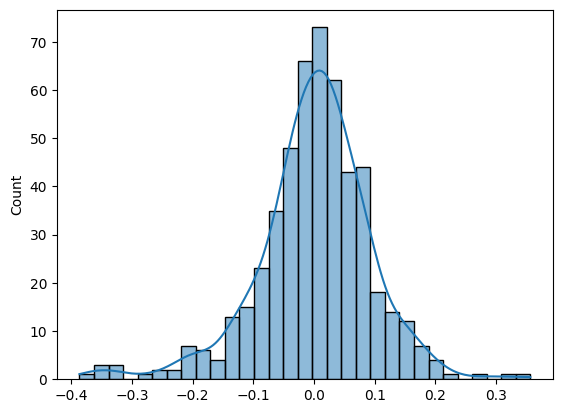

In [80]:
# checking for normal distribution
sns.histplot(training_residuals,kde=True)
plt.show()

### residuals are normally distributed across mean 0 which is a good indication for the model

In [81]:
print("Final Columns we need to keep in the test set are : ",x_train_sm.columns)

Final Columns we need to keep in the test set are :  Index(['const', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'atemp',
       'hum', 'windspeed', 'summer', 'winter', 'Light Snow/Rain & Clouds',
       'Mist & Clouds'],
      dtype='object')


In [82]:
df_test.head(7)

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,spring,summer,winter,Light Snow/Rain & Clouds,Mist & Clouds
184,0,7,1,1,0,29.793347,33.27085,63.7917,5.459106,3065,2978,6043,0,0,0,0,1
535,1,6,0,3,1,32.082500,36.04875,59.2083,7.625404,872,5339,6211,0,1,0,0,0
299,0,10,0,4,1,19.270000,22.85230,81.2917,13.250121,240,2419,2659,0,0,1,0,1
221,0,8,0,3,1,31.433347,34.24915,42.4167,13.417286,884,3896,4780,0,0,0,0,0
152,0,6,0,4,1,29.315000,32.19710,30.5000,19.583229,736,4232,4968,0,1,0,0,0
404,1,2,0,4,1,10.865000,13.09940,56.2083,13.000479,163,3667,3830,1,0,0,0,0
198,0,7,0,1,1,30.613347,35.19625,65.1250,14.458868,841,3617,4458,0,0,0,0,0


In [83]:
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [84]:
df_test.head(4)

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,spring,summer,winter,Light Snow/Rain & Clouds,Mist & Clouds
184,0,7,1,1,0,0.831783,0.769660,0.657364,0.084219,0.933557,0.427086,0.692706,0,0,0,0,1
535,1,6,0,3,1,0.901354,0.842587,0.610133,0.153728,0.265163,0.767976,0.712034,0,1,0,0,0
299,0,10,0,4,1,0.511964,0.496145,0.837699,0.334206,0.072539,0.346376,0.303382,0,0,1,0,1
221,0,8,0,3,1,0.881625,0.795343,0.437098,0.339570,0.268820,0.559630,0.547400,0,0,0,0,0


In [85]:
df_test[num_vars].describe()

,temp,atemp,hum,windspeed,casual,registered,cnt
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.558718,0.532847,0.638221,0.313293,0.266436,0.529076,0.522154
std,0.233187,0.217401,0.148694,0.159584,0.216751,0.219300,0.219163
min,0.046591,0.025950,0.261915,-0.042808,0.002133,0.059486,0.048205
25%,0.355429,0.344870,0.529197,0.198843,0.102484,0.359190,0.378595
50%,0.558172,0.544652,0.625590,0.300126,0.225236,0.527577,0.524678
75%,0.755981,0.713308,0.743798,0.402718,0.361780,0.667088,0.677750
max,0.984424,0.980934,1.002146,0.807474,1.038708,0.985273,0.963300


In [86]:
#making the cols used same as in train and test
df_test.drop(columns=['temp','casual','spring','registered'],inplace=True)

In [87]:
x_train_sm.head(3)

,const,yr,mnth,holiday,weekday,workingday,atemp,hum,windspeed,summer,winter,Light Snow/Rain & Clouds,Mist & Clouds
576,1.0,1,7,0,2,1,0.766351,0.725633,0.264686,0,0,0,0
426,1.0,1,3,0,6,0,0.438975,0.640189,0.255342,0,0,0,1
728,1.0,1,12,0,0,0,0.200348,0.498067,0.663106,0,0,0,0


In [88]:
df_test.head(3)

,yr,mnth,holiday,weekday,workingday,atemp,hum,windspeed,cnt,summer,winter,Light Snow/Rain & Clouds,Mist & Clouds
184,0,7,1,1,0,0.769660,0.657364,0.084219,0.692706,0,0,0,1
535,1,6,0,3,1,0.842587,0.610133,0.153728,0.712034,1,0,0,0
299,0,10,0,4,1,0.496145,0.837699,0.334206,0.303382,0,1,0,1


### Creating x_test , y_test from df_test

In [89]:
y_test = df_test.pop('cnt')
x_test = df_test

In [90]:
x_test.columns

Index(['yr', 'mnth', 'holiday', 'weekday', 'workingday', 'atemp', 'hum',
       'windspeed', 'summer', 'winter', 'Light Snow/Rain & Clouds',
       'Mist & Clouds'],
      dtype='object')

In [91]:
# doing model prediction
x_test_sm = sm.add_constant(x_test)

In [92]:
y_test_pred = lr_model4.predict(x_test_sm)

In [93]:
testing_residuals = y_test - y_test_pred

### checking if residuals are normally distributed

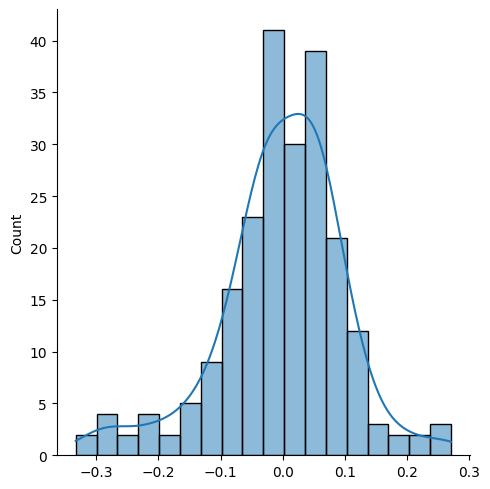

In [94]:
sns.displot(testing_residuals,kde=True)
plt.show()

### Checking Model Accuracy on test dataset


In [95]:
from sklearn.metrics import r2_score


In [96]:
r2_score(y_true = y_test,y_pred = y_test_pred)

0.7910494553088169

In [97]:
print("R2 Score value for test data is : ",r2_score(y_test,y_test_pred))

R2 Score value for test data is :  0.7910494553088169
